In [1]:
#Required for accessing openml datasets from Lale
!pip install 'liac-arff>=2.4.0'

In [2]:
import lale.datasets.openml
import pandas as pd
(train_X, train_y), (test_X, test_y) = lale.datasets.openml.fetch(
    'credit-g', 'classification', preprocess=True)

In [3]:
from sklearn.preprocessing import StandardScaler as Standard, MinMaxScaler as MinMax
from sklearn.decomposition import PCA
from sklearn.kernel_approximation import Nystroem as Nys
from lale.lib.lale import NoOp
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
from xgboost import XGBClassifier as XGBoost
from lale.lib.lale import TopKVotingClassifier
from sklearn.metrics import accuracy_score
from lale.lib.lale import Hyperopt
from sklearn.ensemble import VotingClassifier
lale.wrap_imported_operators()

The optimizer supported as of now is Hyperopt and args_to_optimizer
is a dictionary of values that Hyperopt would accept as per
https://lale.readthedocs.io/en/latest/modules/lale.lib.lale.hyperopt.html

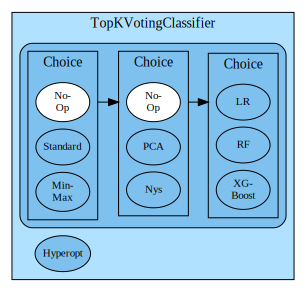

In [4]:
planned_pipeline = (NoOp | Standard | MinMax) >> (NoOp | PCA | Nys) >> (LR | RF | XGBoost)
ensemble = TopKVotingClassifier(
    estimator=planned_pipeline, k=3, optimizer=Hyperopt,
    args_to_optimizer={'max_evals':25, 'scoring':'accuracy'})
ensemble.visualize()

In [5]:
trained_ensemble = ensemble.fit(train_X, train_y)

100%|█████████| 1/1 [00:06<00:00,  6.63s/trial, best loss: -0.7508298939720779]


In [6]:
#Note that you could also pass just the planned pipeline as below and Hyperopt with its default setting would be used.
ensemble = TopKVotingClassifier(estimator=planned_pipeline)

In [7]:
predictions = trained_ensemble.predict(test_X)
print(accuracy_score(test_y, predictions))

0.7515151515151515


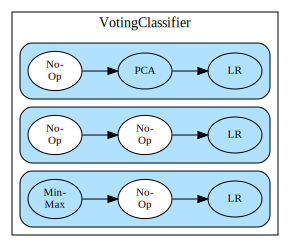

In [8]:
best_pipeline = trained_ensemble.get_pipeline()
best_pipeline.visualize()

In [9]:
best_pipeline.to_json()

{'class': 'lale.lib.sklearn.voting_classifier.VotingClassifierImpl',
 'state': 'trained',
 'operator': 'VotingClassifier',
 'label': 'VotingClassifier',
 'documentation_url': 'https://scikit-learn.org/0.20/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn-ensemble-votingclassifier',
 'hyperparams': {'estimators': [('p14', {'$ref': '../steps/pipeline'}),
   ('p21', {'$ref': '../steps/pipeline_0'}),
   ('p11', {'$ref': '../steps/pipeline_1'})],
  'voting': 'soft'},
 'steps': {'pipeline': {'class': 'lale.operators.TrainablePipeline',
   'state': 'trainable',
   'edges': [['no_op', 'pca'], ['pca', 'lr']],
   'steps': {'no_op': {'class': 'lale.lib.lale.no_op.NoOpImpl',
     'state': 'trained',
     'operator': 'NoOp',
     'label': 'NoOp',
     'documentation_url': 'https://lale.readthedocs.io/en/latest/modules/lale.lib.lale.no_op.html',
     'hyperparams': {},
     'is_frozen_trainable': True,
     'coefs': None,
     'is_frozen_trained': True},
    'pca': {'class': 'lale.li